<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


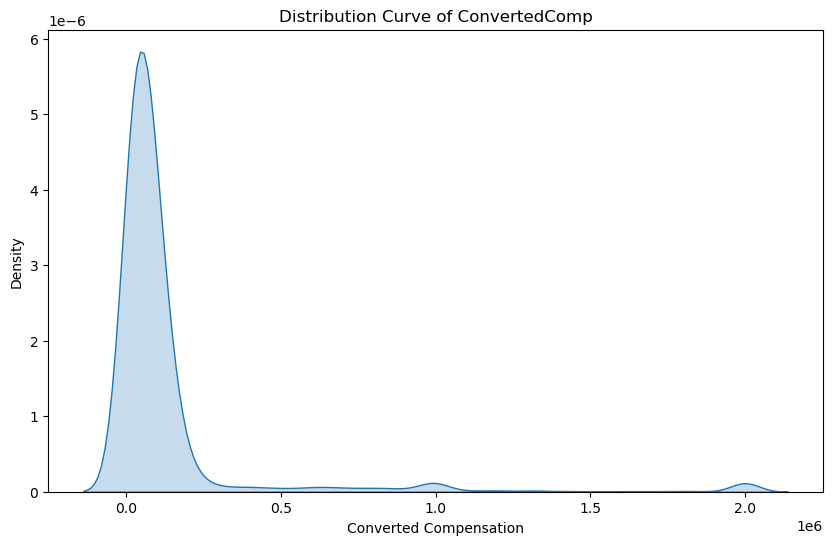

In [16]:
# your code goes here
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you've already loaded your DataFrame 'df' correctly
# For example:
# df = pd.read_csv("path/to/your/local/m2_survey_data.csv")

# Set the size of the figure
plt.figure(figsize=(10, 6))

# Plot the Kernel Density Estimate (KDE) for 'ConvertedComp'
sns.kdeplot(df['ConvertedComp'], fill=True)

# Add title and labels
plt.title('Distribution Curve of ConvertedComp')
plt.xlabel('Converted Compensation')
plt.ylabel('Density')

# Show the plot
plt.show()



Plot the histogram for the column `ConvertedComp`.


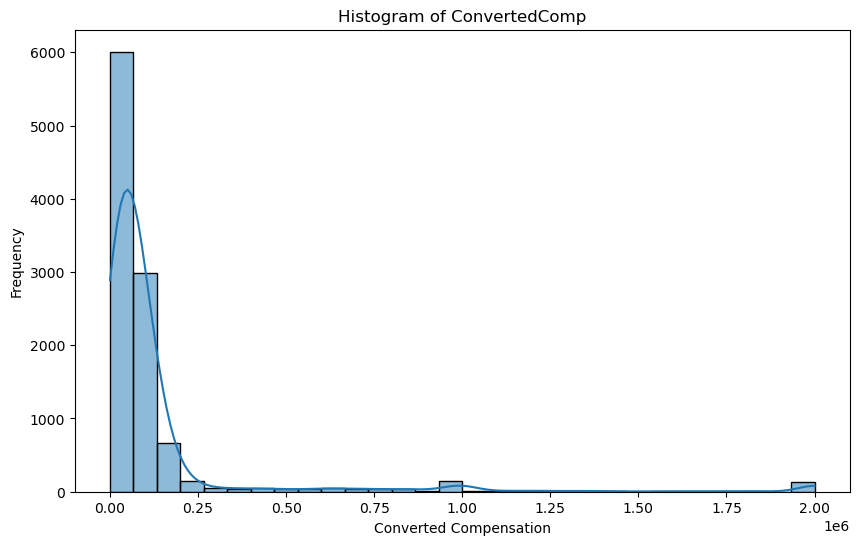

In [17]:
# your code goes here
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your DataFrame 'df' if it's not already loaded
# For example:
# df = pd.read_csv("path/to/your/local/m2_survey_data.csv")

# Create a figure for the histogram
plt.figure(figsize=(10, 6))

# Plot a histogram with Kernel Density Estimate (KDE)
sns.histplot(df['ConvertedComp'], bins=30, kde=True)

# Add title and labels
plt.title('Histogram of ConvertedComp')
plt.xlabel('Converted Compensation')
plt.ylabel('Frequency')

# Show the plot
plt.show()



What is the median of the column `ConvertedComp`?


In [5]:
# your code goes here
median_converted_comp = df['ConvertedComp'].median()
print("Median of ConvertedComp:", median_converted_comp)


Median of ConvertedComp: 57745.0


How many responders identified themselves only as a **Man**?


In [6]:
# your code goes here
men_count = df[df['Gender'] == 'Man'].shape[0]
print("Number of responders identifying as Man:", men_count)


Number of responders identifying as Man: 10480


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [7]:
# your code goes here
median_converted_comp_women = df[df['Gender'] == 'Woman']['ConvertedComp'].median()
print("Median ConvertedComp of responders identifying as Woman:", median_converted_comp_women)


Median ConvertedComp of responders identifying as Woman: 57708.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [8]:
# your code goes here
age_summary = df['Age'].describe()
print("Five-number summary for Age:\n", age_summary)


Five-number summary for Age:
 count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64


Plot a histogram of the column `Age`.


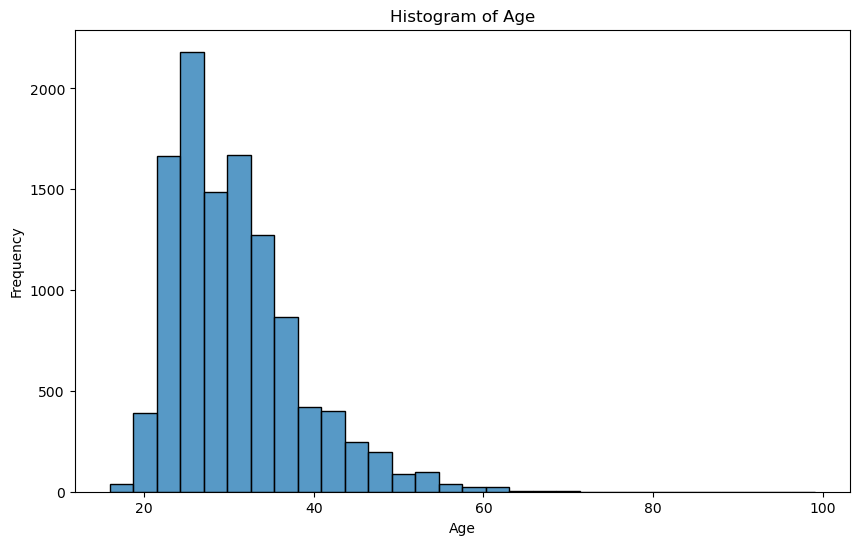

In [18]:
# your code goes here
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your DataFrame 'df' if it's not already loaded
# For example:
# df = pd.read_csv("path/to/your/local/m2_survey_data.csv")

# Create a figure for the histogram
plt.figure(figsize=(10, 6))

# Plot a histogram for the 'Age' column
sns.histplot(df['Age'], bins=30)

# Add title and labels
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Show the plot
plt.show()



## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


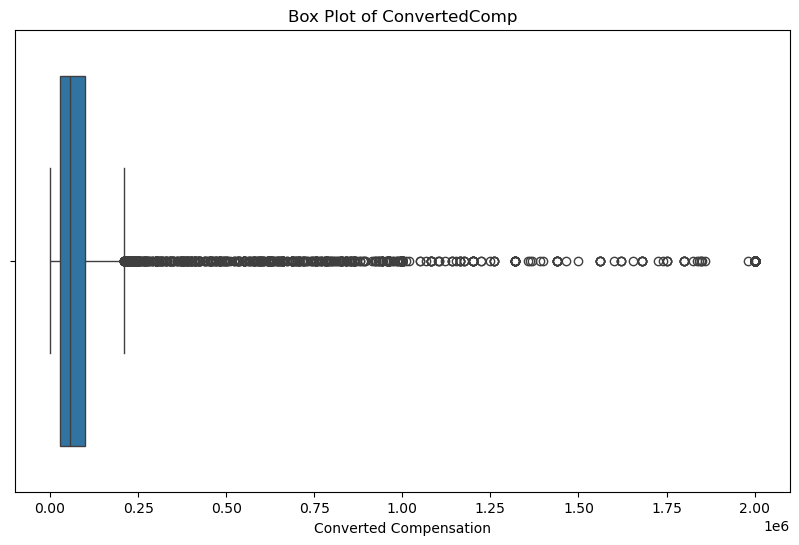

In [19]:
# your code goes here
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your DataFrame 'df' if it's not already loaded
# For example:
# df = pd.read_csv("path/to/your/local/m2_survey_data.csv")

# Create a figure for the box plot
plt.figure(figsize=(10, 6))

# Plot a box plot for the 'ConvertedComp' column
sns.boxplot(x=df['ConvertedComp'])

# Add title and labels
plt.title('Box Plot of ConvertedComp')
plt.xlabel('Converted Compensation')

# Show the plot
plt.show()



Find out the Inter Quartile Range for the column `ConvertedComp`.


In [11]:
# your code goes here
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)
IQR = Q3 - Q1
print("Inter Quartile Range (IQR) for ConvertedComp:", IQR)


Inter Quartile Range (IQR) for ConvertedComp: 73132.0


Find out the upper and lower bounds.


In [12]:
# your code goes here
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)


Lower Bound: -82830.0
Upper Bound: 209698.0


Identify how many outliers are there in the `ConvertedComp` column.


In [13]:
# your code goes here
outliers_count = df[(df['ConvertedComp'] < lower_bound) | (df['ConvertedComp'] > upper_bound)].shape[0]
print("Number of outliers in ConvertedComp:", outliers_count)


Number of outliers in ConvertedComp: 879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [14]:
# your code goes here
df_no_outliers = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]
print("New DataFrame shape without outliers:", df_no_outliers.shape)


New DataFrame shape without outliers: (9703, 85)


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [20]:
# your code goes here
import pandas as pd

# Load your DataFrame 'df' if it's not already loaded
# For example:
# df = pd.read_csv("path/to/your/local/m2_survey_data.csv")

# Check the data types of the DataFrame
print(df.dtypes)

# Select only numeric columns
numeric_df = df.select_dtypes(include='number')

# Calculate the correlation matrix
correlation = numeric_df.corr()

# Get correlation for 'Age'
age_correlation = correlation['Age']
print("Correlation between Age and other numerical columns:\n", age_correlation)




Respondent       int64
MainBranch      object
Hobbyist        object
OpenSourcer     object
OpenSource      object
                 ...  
Sexuality       object
Ethnicity       object
Dependents      object
SurveyLength    object
SurveyEase      object
Length: 85, dtype: object
Correlation between Age and other numerical columns:
 Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
Name: Age, dtype: float64


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
